In [1]:
## DSC 550
## Carlos Cano
## Activity 10.2

In [2]:
## ** ---------- **

In [3]:
print('** ----------- **')
print('** Milestone 1 **')
print('** ----------- **')

** ----------- **
** Milestone 1 **
** ----------- **


In [4]:
## ** ---------- **

In [5]:
## Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem. 
## Clearly identify the problem you will address and the target for your model.

In [6]:
## Then, do a graphical analysis creating a minimum of four graphs.
## Label your graphs appropriately and explain/analyze the information provided by each graph.
## Your analysis should begin to answer the question(s) you are addressing.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import norm

import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn import linear_model
import statsmodels.api as sm

In [10]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815882 entries, 0 to 815881
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           815882 non-null  int64  
 1   Date Rptd       815882 non-null  object 
 2   DATE OCC        815882 non-null  object 
 3   TIME OCC        815882 non-null  int64  
 4   AREA            815882 non-null  int64  
 5   AREA NAME       815882 non-null  object 
 6   Rpt Dist No     815882 non-null  int64  
 7   Part 1-2        815882 non-null  int64  
 8   Crm Cd          815882 non-null  int64  
 9   Crm Cd Desc     815882 non-null  object 
 10  Mocodes         703120 non-null  object 
 11  Vict Age        815882 non-null  int64  
 12  Vict Sex        708690 non-null  object 
 13  Vict Descent    708682 non-null  object 
 14  Premis Cd       815873 non-null  float64
 15  Premis Desc     815402 non-null  object 
 16  Weapon Used Cd  284434 non-null  float64
 17  Weapon Des

In [12]:
df.head(1)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978


In [13]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

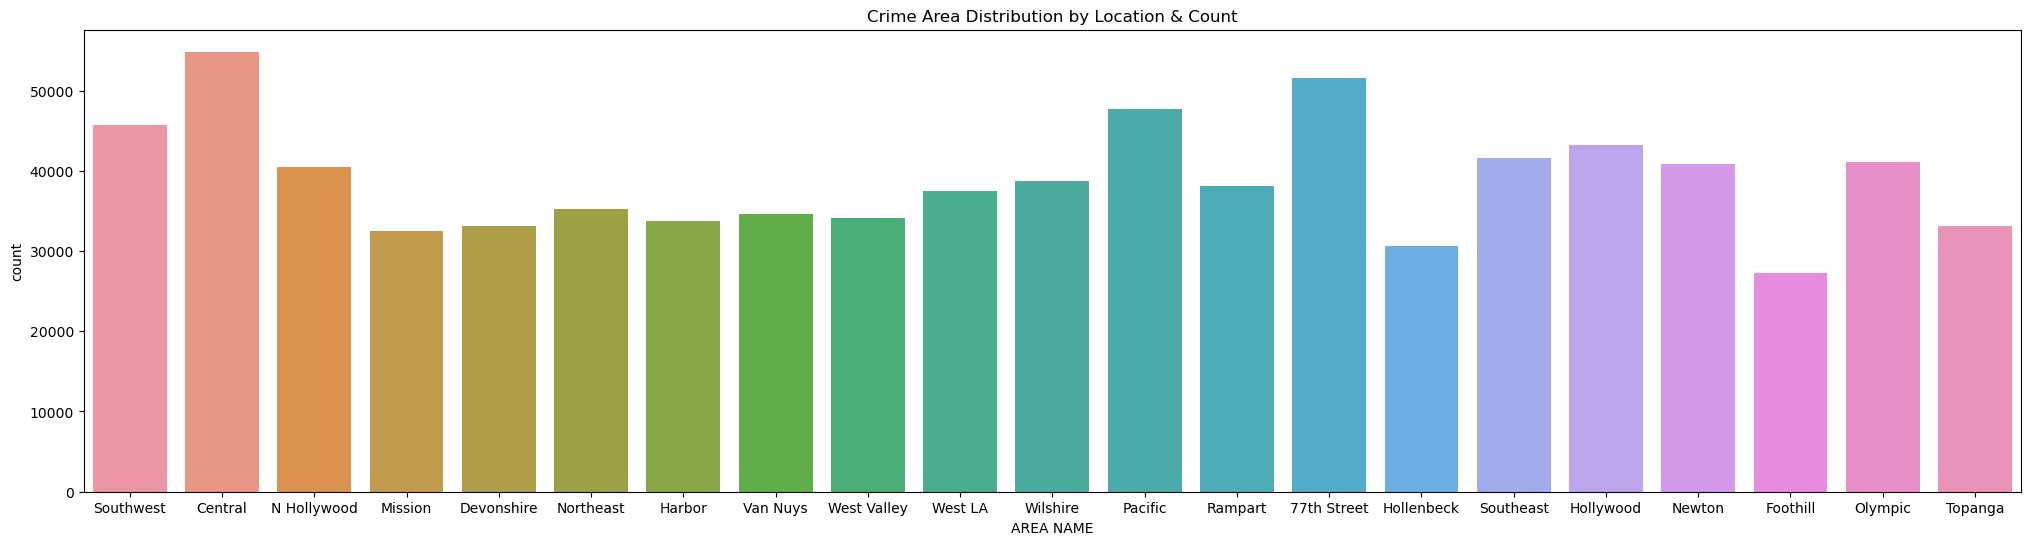

In [14]:
plt.figure(figsize=(25,6))
sns.countplot(x='AREA NAME', data=df)
plt.title('Crime Area Distribution by Location & Count')
plt.show()


Size = df[['Crm Cd Desc','AREA NAME']].groupby(['Crm Cd Desc'], as_index=False).sum()
#Size.sort_values(by=['Crm Cd Desc'],ascending=False).head(5)

In [15]:
## This graph showcases the various areas within the reported data from Los Angeles Crime Dataset

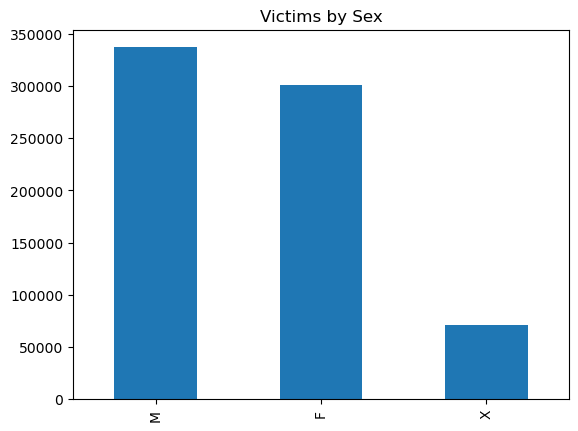

In [16]:
df['Vict Sex'].value_counts().iloc[:3].plot(kind='bar', title='Victims by Sex');

In [17]:
## This graph explains the distribution of Victims by Sex within the Dataset, there seems to be a fairly level distribution from the reported cases with the exception of non M / F.

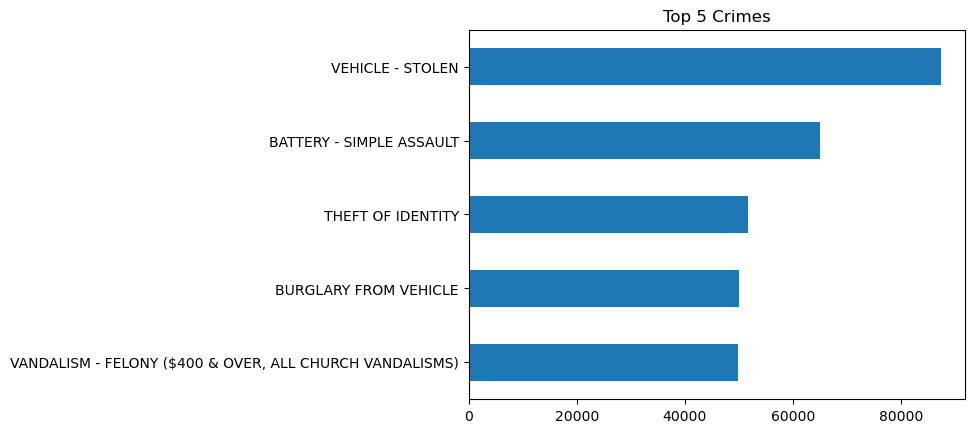

In [18]:
df['Crm Cd Desc'].value_counts().iloc[:5].sort_values().plot(kind='barh',title="Top 5 Crimes");

In [19]:
## This graph highlights the top 5 crimes within Los Angeles from 2020-Current with a dataset of about 900,000 stolen vehicle appears to be about 10% of crimes.

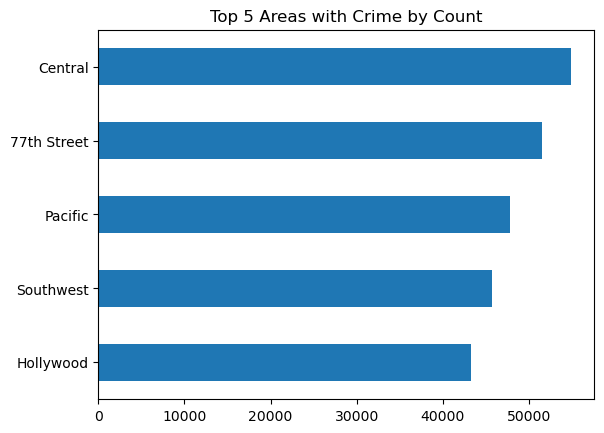

In [20]:
df['AREA NAME'].value_counts().iloc[:5].sort_values().plot(kind='barh',title="Top 5 Areas with Crime by Count");

In [21]:
## This further elaborates on area, with a deeper look at the top 5 areas of reported crime. As noted in the global graph there was a fairly even distribution. Central Los Angeles, formally known as South Central alongside 77th Street make up over 10% of the reported crime for this dataset.

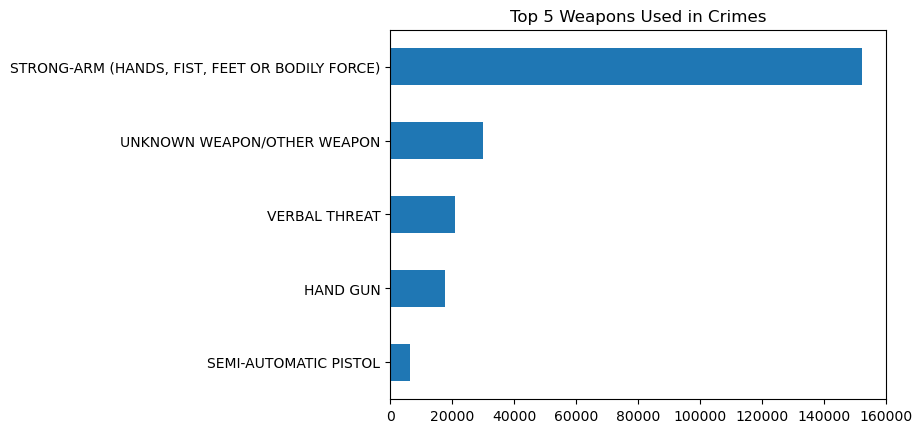

In [22]:
df['Weapon Desc'].value_counts().iloc[:5].sort_values().plot(kind='barh',title="Top 5 Weapons Used in Crimes");

In [23]:
## This graph highlights the Top 5 Weapons reportedly used in crimes, with an outlier of Strong-Arm accounting for nearly 20% of reported crime. This quickly falls off for the other weapons.

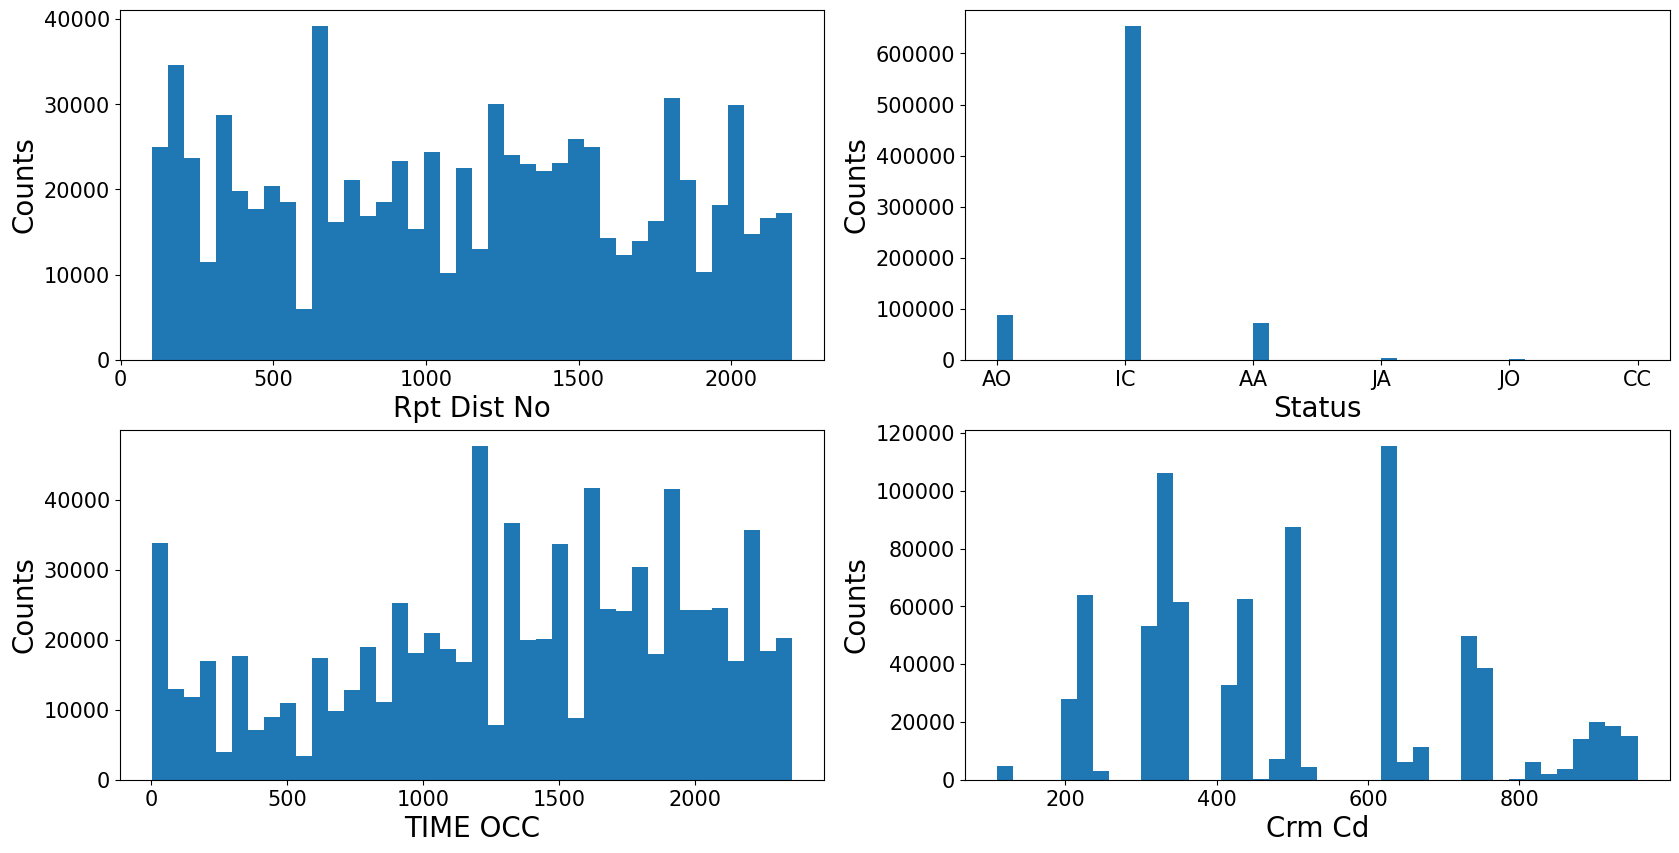

In [24]:
plt.rcParams['figure.figsize'] = (20, 10)

fig, axes = plt.subplots(nrows = 2, ncols = 2)


num_features = ['Rpt Dist No', 'Status', 'TIME OCC', 'Crm Cd']

xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [25]:
## These graphs were used to gain insight to other integer type variables and their distributions, of particular interest is increases in reported crime at midnight and 12 o clock pm.

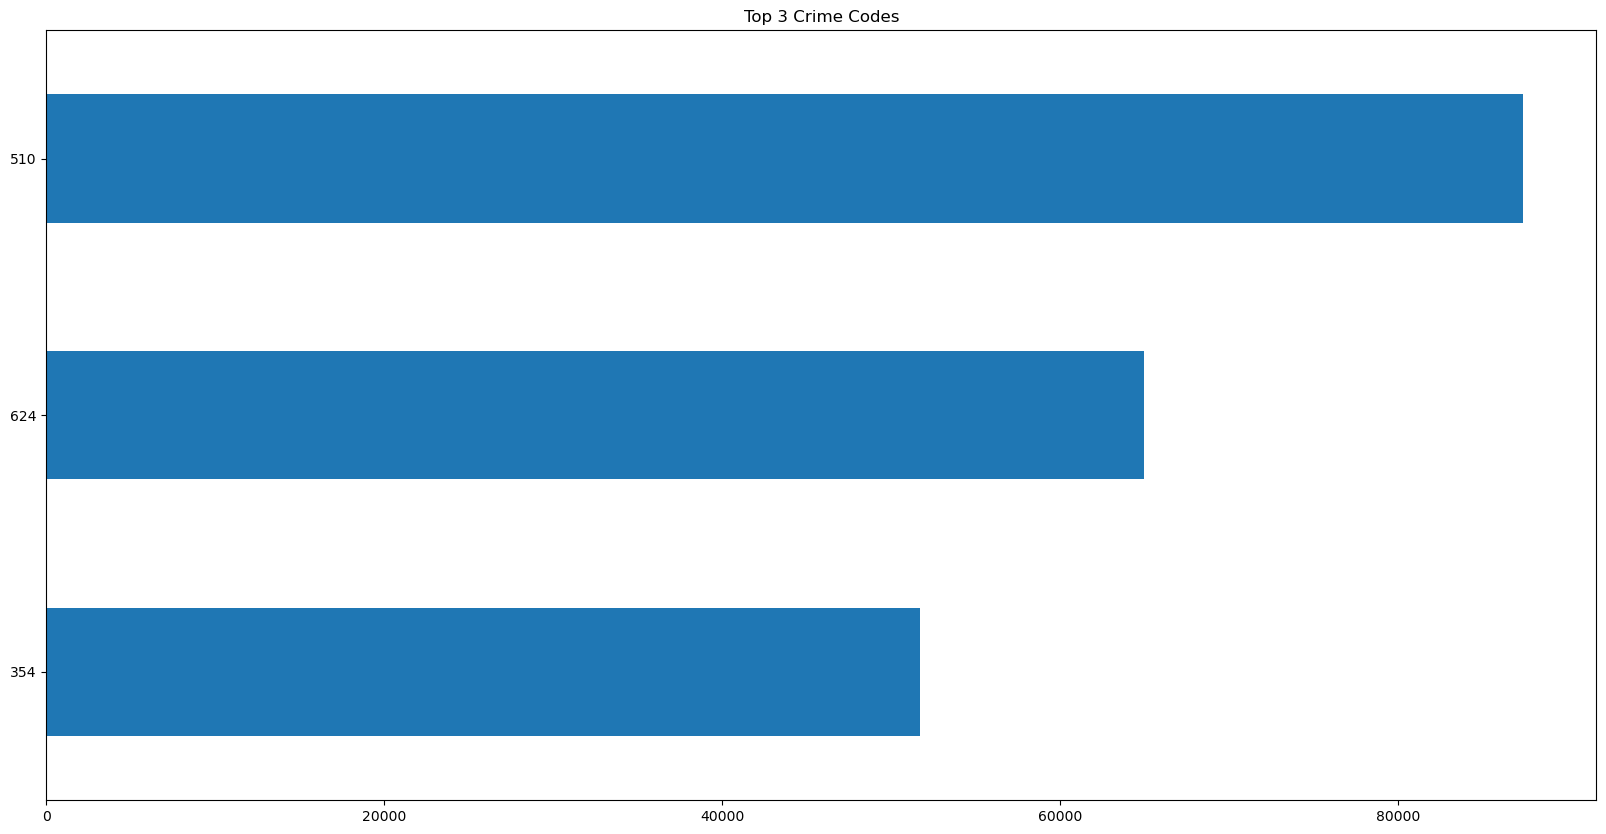

In [26]:
df['Crm Cd'].value_counts().iloc[:3].sort_values().plot(kind='barh',title="Top 3 Crime Codes");

In [27]:
# This graph highlights the Top 3 reported crimes by their code. 510: Speeding or Racing | 624: Battery Simmple Assault | 354: Theft of ID, this was a offshoot from the multi-variable graphset previous to this.

In [28]:
## Write a short overview/conclusion of the insights gained from your graphical analysis.

In [29]:
# There was some definite insight garnered through this graphical analysis, as noted in each section. Area, Time OCC, and Crm Cd stood out as data of particular note from this graphical analysis.

In [30]:
## ** ---------- **

In [31]:
print('** ----------- **')
print('** Milestone 2 **')
print('** ----------- **')

** ----------- **
** Milestone 2 **
** ----------- **


In [32]:
## ** ---------- **

In [33]:
## Drop any features that are not useful for your model building and explain why they are not useful.

In [34]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [35]:
df2=df.drop(columns=['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1)

In [36]:
# Crm Cd 1, Crm Cd 2, Crm Cd 3 and Crm Cd 4 are redundant as specific Crm Cd variable is preserved.

In [37]:
df2=df2.drop(columns=['LAT', 'LON' , 'Cross Street', 'DR_NO', 'Date Rptd', 'LOCATION', 'DATE OCC'], axis=1)

In [38]:
# LOCATION, LAT, LON, and Cross Street are all very specific geographic locations that encompassed in AREA variable that is preserved.

In [39]:
# Date Rptd and DATE OCC are similar in nature but unnecessary in relation to the focus of this research.

In [40]:
# DR_NO is just the specific incident number, which can also be represented as a row for the purposes of this EDA.

In [41]:
df2=df2.drop(columns=['Status', 'Status Desc'], axis=1)

In [42]:
# Status and Status Desc explain whether the case is ongoing or closed, again for this research is also irrelavent. 

In [43]:
df2=df2.drop(columns=['AREA NAME', 'Crm Cd Desc', 'Premis Desc'], axis=1)

In [44]:
# AREA NAME, Crm Cd Desc and Premis Desc are redudant as serve only as references to their numeric value which are preserved in the modified dataset.

In [45]:
df2=df2.drop(columns=['Weapon Desc', 'Vict Descent', 'Mocodes', 'Part 1-2'], axis=1)

In [46]:
# Mocodes has to do with Modus Operandi and describes the activity the suspect was engaging in. Part 1-2 has no description or associated identifying labels/descriptors.

In [47]:
# Weapon Desc and Vict Descent are descriptive data that are redundant on superfluous in nature.

In [48]:
df2=df2.drop(columns=['Weapon Used Cd'], axis=1)

In [49]:
# This data was to be used, but with over 400,000 Nans in this column, the decision to remove it was made to preserve more overall data. It's telling as a lot of crimes are committed without a weapon.

In [50]:
df2.head()

,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Premis Cd
0,2230,3,377,624,36,F,501.0
1,330,1,163,624,25,M,102.0
2,1200,1,155,845,0,X,726.0
3,1730,15,1543,745,76,F,502.0
4,415,19,1998,740,31,X,409.0


In [51]:
df2.describe()

,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd
count,815882.000000,815882.000000,815882.000000,815882.000000,815882.000000,815873.000000
mean,1335.614658,10.711521,1117.576886,500.777800,29.818963,305.776683
std,654.102822,6.092813,609.276287,207.816937,21.772828,216.646998
min,1.000000,1.000000,101.000000,110.000000,-3.000000,101.000000
25%,900.000000,6.000000,621.000000,331.000000,8.000000,101.000000
50%,1415.000000,11.000000,1142.000000,442.000000,31.000000,203.000000
75%,1900.000000,16.000000,1617.000000,626.000000,45.000000,501.000000
max,2359.000000,21.000000,2199.000000,956.000000,120.000000,976.000000


In [52]:
## Perform any data extraction/selection steps.

In [53]:
## Transform features if necessary.

In [54]:
df2["Vict Sex"]

0         F
1         M
2         X
3         F
4         X
         ..
815877    M
815878    F
815879    M
815880    F
815881    F
Name: Vict Sex, Length: 815882, dtype: object

In [55]:
df2['Vict Sex'].nunique()

5

In [56]:
df2.replace({'F':0,'M':1, 'X':2, 'H':3, "-":4}, inplace=True)

In [57]:
print(df2['Vict Sex'].value_counts())

1.0    337050
0.0    300602
2.0     70947
3.0        90
4.0         1
Name: Vict Sex, dtype: int64


In [58]:
## Remove Nans

In [59]:
df2['Vict Sex'] = df2['Vict Sex'].replace(np.nan, 2)

In [60]:
# After processing, data in df2 Vict Sex was adjust for unknown values. NaNs converted to unknown labeled as value 2 as missing values are unknown.

In [61]:
df2 = df2.drop(df2[df2['Vict Sex'] == 3].index)

In [62]:
df2 = df2.drop(df2[df2['Vict Sex'] == 4].index)

In [63]:
# Variables 3 & 4 previous labeled H & - were dropped as erroneously reported data.

In [64]:
df2['Vict Sex'] = pd.to_numeric(df2['Vict Sex'])

In [65]:
df2['Vict Sex'] = df2['Vict Sex'].astype('int64')

In [66]:
print(df2['Vict Sex'].value_counts())

1    337050
0    300602
2    178139
Name: Vict Sex, dtype: int64


In [67]:
## Engineer new useful features.

In [68]:
df2['Premis Cd'] = df2['Premis Cd'].replace(np.nan, 710)

In [69]:
## NaNs replaced with code 710 which is labeled as other.

In [70]:
df2['Premis Cd'] = df2['Premis Cd'].astype('int64')

In [71]:
## Deal with missing data (do not just drop rows or columns without justifying this).

In [72]:
NaN_Missing_Count = df2.isnull().sum(axis = 0)

NaN_Missing_Count

TIME OCC       0
AREA           0
Rpt Dist No    0
Crm Cd         0
Vict Age       0
Vict Sex       0
Premis Cd      0
dtype: int64

In [73]:
df2.head()

,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Premis Cd
0,2230,3,377,624,36,0,501
1,330,1,163,624,25,1,102
2,1200,1,155,845,0,2,726
3,1730,15,1543,745,76,0,502
4,415,19,1998,740,31,2,409


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815791 entries, 0 to 815881
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   TIME OCC     815791 non-null  int64
 1   AREA         815791 non-null  int64
 2   Rpt Dist No  815791 non-null  int64
 3   Crm Cd       815791 non-null  int64
 4   Vict Age     815791 non-null  int64
 5   Vict Sex     815791 non-null  int64
 6   Premis Cd    815791 non-null  int64
dtypes: int64(7)
memory usage: 49.8 MB


In [75]:
df4 = df2

In [76]:
## Create dummy variables if necessary.

In [77]:
# df3 = pd.get_dummies(df2)

In [78]:
# As data was filtered and descriptions removed the need for dummy variables was unwarranted. Coding was placed to showcase how to do so in the event it was needed.

In [79]:
## ** ---------- **

In [80]:
print('** ----------- **')
print('** Milestone 3 **')
print('** ----------- **')

** ----------- **
** Milestone 3 **
** ----------- **


In [81]:
## ** ---------- **

In [82]:
## You are required to train and evaluate at least one model in this milestone. 

In [83]:
print('** ------------------------------ **')
print('** AREA K Nearest Neighbors Model **')
print('** ------------------------------ **')

** ------------------------------ **
** AREA K Nearest Neighbors Model **
** ------------------------------ **


In [84]:
## As the data has been cleaned, and there are a finite amount of variables, clustering of the data for AREA will be the focus.

In [85]:
X = df2.drop('AREA', axis=1)
y = df2['AREA']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
pipeline = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier())])

In [88]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [89]:
accuracy = pipeline.score(X_test, y_test)

print("The accuracy of the KNN classifier from the test set is: {:.2f}".format(accuracy*100),"%")

The accuracy of the KNN classifier from the test set is: 85.77 %


In [90]:
print('** ---------------------------- **')
print('** AREA Linear Regression Model **')
print('** ---------------------------- **')

** ---------------------------- **
** AREA Linear Regression Model **
** ---------------------------- **


In [91]:
## Taking a practical approach for dependent variable we will look at the relationship of this model other variables in relation to AREA.

In [92]:
LinearModel = linear_model.LinearRegression()

In [93]:
LinearModel.fit(X,y)

LinearRegression()

In [94]:
model = sm.OLS(y, X).fit()

In [95]:
prediction = model.predict(X)

In [96]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   AREA   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.614e+08
Date:                Sat, 18 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:49:42   Log-Likelihood:                     -1.2185e+05
No. Observations:              815791   AIC:                                  2.437e+05
Df Residuals:                  815785   BIC:                                  2.438e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [97]:
print("The accuracy of the Linear Regression Model of AREA from the test set is: 99.9%")

The accuracy of the Linear Regression Model of AREA from the test set is: 99.9%


In [98]:
prediction.head(3)

0    3.323915
1    1.304809
2    1.026085
dtype: float64

In [99]:
y.head(3)

0    3
1    1
2    1
Name: AREA, dtype: int64

In [100]:
xyz = pd.concat([y, prediction], axis = 1, join = "inner")
xyz = xyz.rename(columns={'AREA':'y', 0:'prediction'})
xyz['residual'] = xyz['y'] - xyz['prediction']

In [101]:
# xyz[['residual']].head(7).style.hide(axis='index')

In [102]:
print('** -------------------------------- **')
print('** TIME OCC Linear Regression Model **')
print('** -------------------------------- **')

** -------------------------------- **
** TIME OCC Linear Regression Model **
** -------------------------------- **


In [103]:
X2 = df2.drop('TIME OCC', axis=1)
y2 = df2['TIME OCC']

In [104]:
X2.head()

,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Premis Cd
0,3,377,624,36,0,501
1,1,163,624,25,1,102
2,1,155,845,0,2,726
3,15,1543,745,76,0,502
4,19,1998,740,31,2,409


In [105]:
LinearModel2 = linear_model.LinearRegression()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [107]:
LinearModel2.fit(X2,y2)

LinearRegression()

In [108]:
model2 = sm.OLS(y2, X2).fit()

In [109]:
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:               TIME OCC   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                          4.624e+05
Date:                Sat, 18 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:49:42   Log-Likelihood:                     -6.5122e+06
No. Observations:              815791   AIC:                                  1.302e+07
Df Residuals:                  815785   BIC:                                  1.302e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [110]:
print("The accuracy of the Linear Regression Model of TIME OCC from the test set is: 73.3%")

The accuracy of the Linear Regression Model of TIME OCC from the test set is: 73.3%


In [111]:
##  Write step-by-step for performing each of these steps.
## You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose.

In [112]:
## Write a short overview/conclusion of the insights gained from your model building/evaluation.

In [113]:
# Looking at the various models, it's clear that when accounting for the test model of AREA there is a high factor of 85.77% using the KNN model, while satisfactory a separate look was taken using a linear regression model with garnered a near perfect model. As such, when accounting for TIME OCC there was a significant drop in a linear regression model's explanatory data of a suggested 77.3%. This would suggest given the data imported and cleaned as well as tested shows a strong correlation as well as explained tested data.

In [114]:
print('** ------------- **')
print('** Data Revision **')
print('** ------------- **')

** ------------- **
** Data Revision **
** ------------- **


In [115]:
## Separation of data from Vict Sex was revisited as originally data was converted into int64 from object. It occurred to me that the data could have been preserved and factored into the model within its original format. 

In [116]:
## This would allow for the creation of dummie variables and explore the data similar to that of previous assignments.

In [117]:
df3 = df2

In [118]:
df3['Vict Sex'].replace({0:'F', 1:'M', 2: 'X'}, inplace=True)

In [119]:
df3.head(2)

,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Premis Cd
0,2230,3,377,624,36,F,501
1,330,1,163,624,25,M,102


In [120]:
df3['Vict Sex']

0         F
1         M
2         X
3         F
4         X
         ..
815877    M
815878    F
815879    M
815880    F
815881    F
Name: Vict Sex, Length: 815791, dtype: object

In [121]:
df_cat = df3['Vict Sex']
df_int = df3.drop('Vict Sex', axis=1)

In [122]:
cat_enc = pd.get_dummies(df_cat, drop_first=True)
hot_var_list = cat_enc.columns.tolist()

In [123]:
df_enc = cat_enc.merge(df_int, left_index=True, right_index=True)
enc_var_list = df_enc.columns.tolist()

In [124]:
x_columns = df_enc
x_columns = x_columns.drop('M', axis=1)

In [125]:
y_column = df_enc[('M')]

In [126]:
X_train, X_test, y_train, y_test = train_test_split( x_columns, y_column, test_size=0.2, random_state=12345, stratify= y_column) 

In [127]:
y_t = pd.DataFrame(y_train)
y_t.head(3)

,M
627454,1
496051,0
455606,0


In [128]:
import sys, traceback
class Suppressor(object):
    def __enter__(self):
        self.stdout = sys.stdout
        sys.stdout = self
    def __exit__(self, type, value, traceback):
        sys.stdout = self.stdout
        if type is not None:
            def write(self, x): pass

In [129]:
cat_var_list = ['Vict Sex']
cat_var_list

['Vict Sex']

In [130]:
int_var_list = df_int.columns.tolist()

In [131]:
int_var_list

['TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age', 'Premis Cd']

In [132]:
print('** ---------------------------------- **')
print('** Vict Sex Logistic Regression Model **')
print('** ---------------------------------- **')

** ---------------------------------- **
** Vict Sex Logistic Regression Model **
** ---------------------------------- **


In [133]:
from sklearn.compose import ColumnTransformer

In [134]:
from sklearn.feature_selection import SelectKBest, f_classif

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
column_transformer = ColumnTransformer([("scaler", StandardScaler(), int_var_list)], remainder="passthrough")

In [137]:
logistic_pipeline = Pipeline([('datafeed', column_transformer),('selector', SelectKBest(f_classif, k='all')),('classifier', LogisticRegression())])

In [138]:
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('datafeed',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['TIME OCC', 'AREA',
                                                   'Rpt Dist No', 'Crm Cd',
                                                   'Vict Age',
                                                   'Premis Cd'])])),
                ('selector', SelectKBest(k='all')),
                ('classifier', LogisticRegression())])

In [139]:
y_test_pred = logistic_pipeline.predict(X_test)

In [140]:
from sklearn.metrics import roc_auc_score as rocauc

In [141]:
rocscore = rocauc(y_test, y_test_pred)

In [142]:
print(f'Vict Sex Model Accuracy: {100*logistic_pipeline.score(X_test, y_test)}%')

Vict Sex Model Accuracy: 66.2298739266605%


In [143]:
print(f' Vict Sex ROC AUC Score: {100*rocscore}%')

 Vict Sex ROC AUC Score: 67.09404516294767%


In [144]:
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68     95749
           1       0.57      0.72      0.64     67410

    accuracy                           0.66    163159
   macro avg       0.67      0.67      0.66    163159
weighted avg       0.68      0.66      0.66    163159



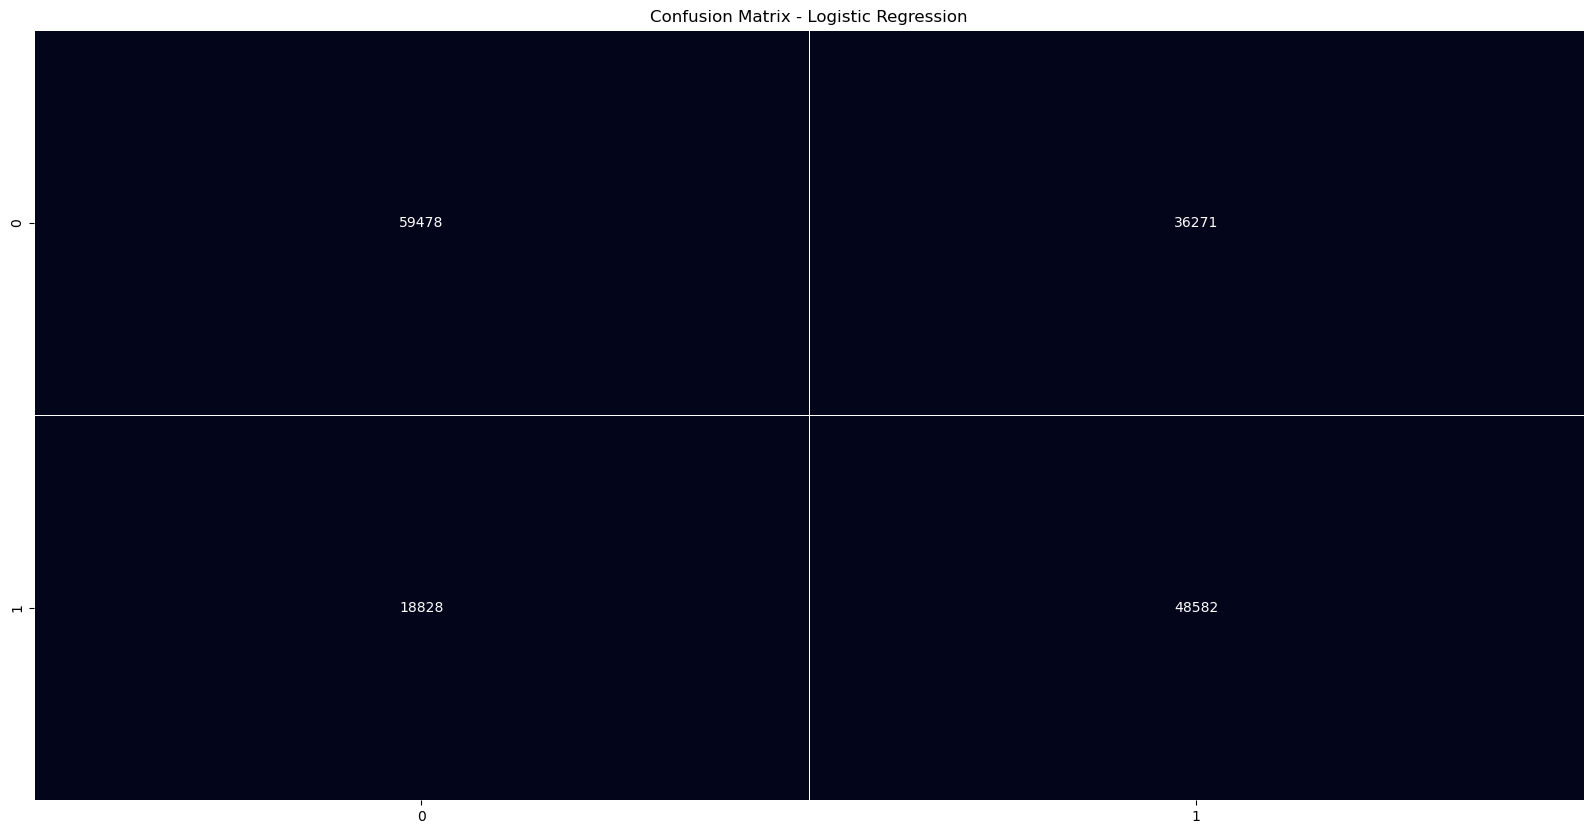

In [146]:
with Suppressor():
    cf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf_matrix, annot=True, fmt='g', 
            vmin=9999999, vmax=9999999, linewidths=.5,
                  cbar=False).set(
        title="Confusion Matrix - Logistic Regression")

In [147]:
## Regression's confusion matrix highlights the classication's report summary, and we can further understand the nature of the True / False Positives and True / False Neagtives within the model.

In [148]:
from imblearn.under_sampling import RandomUnderSampler

In [149]:
rus = RandomUnderSampler(random_state=12345)

In [150]:
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [151]:
logistic_pipeline.fit(X_rus, y_rus)
y_test_pred = logistic_pipeline.predict(X_test)

In [152]:
rocscore = rocauc(y_test, y_test_pred)

In [153]:
print(f'Overall Accuracy: {100*logistic_pipeline.score(X_test, y_test)}%')
print(f'ROC AUC Score: {100*rocscore}%')
print(classification_report(y_test, y_test_pred))

Overall Accuracy: 64.27227428459355%
ROC AUC Score: 68.44096251422485%
              precision    recall  f1-score   support

           0       0.89      0.44      0.59     95749
           1       0.54      0.92      0.68     67410

    accuracy                           0.64    163159
   macro avg       0.72      0.68      0.64    163159
weighted avg       0.75      0.64      0.63    163159



In [154]:
print('** -------------------------------- **')
print('** Vict Sex Linear Regression Model **')
print('** -------------------------------- **')

** -------------------------------- **
** Vict Sex Linear Regression Model **
** -------------------------------- **


In [155]:
## Upon revisiting the data, a comparison of this information was created to account for the previous adjustment.

In [156]:
df4.head(2)

,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Premis Cd
0,2230,3,377,624,36,F,501
1,330,1,163,624,25,M,102


In [157]:
print(df4['Vict Sex'].value_counts())

M    337050
F    300602
X    178139
Name: Vict Sex, dtype: int64


In [158]:
df4.replace({'F':0,'M':1, 'X':2}, inplace=True)

In [159]:
df4.head(2)

,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Premis Cd
0,2230,3,377,624,36,0,501
1,330,1,163,624,25,1,102


In [160]:
X3 = df4.drop('Vict Sex', axis=1)
y3 = df4['Vict Sex']

In [161]:
X3.head(2)

,TIME OCC,AREA,Rpt Dist No,Crm Cd,Vict Age,Premis Cd
0,2230,3,377,624,36,501
1,330,1,163,624,25,102


In [162]:
LinearModel3 = linear_model.LinearRegression()

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [164]:
LinearModel2.fit(X3,y3)

LinearRegression()

In [165]:
model3 = sm.OLS(y3, X3).fit()

In [166]:
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:               Vict Sex   R-squared (uncentered):                   0.613
Model:                            OLS   Adj. R-squared (uncentered):              0.613
Method:                 Least Squares   F-statistic:                          2.158e+05
Date:                Sat, 18 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:49:49   Log-Likelihood:                     -8.7261e+05
No. Observations:              815791   AIC:                                  1.745e+06
Df Residuals:                  815785   BIC:                                  1.745e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [167]:
## *** Milestone 3 Revisit and Revision ***

In [168]:
## Write a short overview/conclusion of the insights gained from your model building/evaluation.

In [169]:
## By revisiting this data and accounting for dummie variables, a logistic regression analysis demonsrated a signicant decrease in the accuracy of this model. It is highly suspect and may need further investigation when accounting for the differences in variables.

In [170]:
## When comparing the Linear vs Logistic regression of the models they are quite close in their Accuracy when accounting for the model's relationship within the variation and test set data.